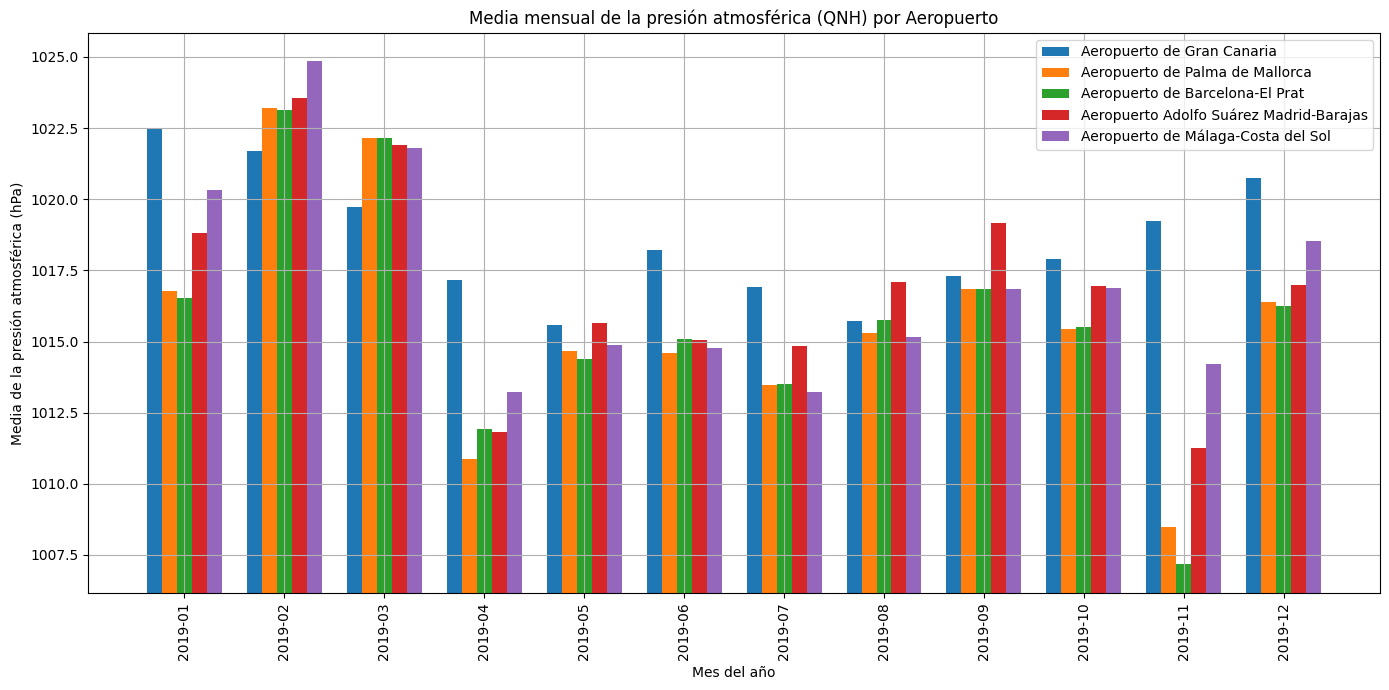

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los archivos y aeropuertos con nombres completos para la leyenda
files = {
    'GCLP': 'GCLP_All.csv',
    'LEPA': 'LEPA_All.csv',
    'LEBL': 'LEBL_All.csv',
    'LEMD': 'LEMD_All.csv',
    'LEMG': 'LEMG_All.csv'
}

airport_names = {
    'GCLP': 'Aeropuerto de Gran Canaria',
    'LEPA': 'Aeropuerto de Palma de Mallorca',
    'LEBL': 'Aeropuerto de Barcelona-El Prat',
    'LEMD': 'Aeropuerto Adolfo Suárez Madrid-Barajas',
    'LEMG': 'Aeropuerto de Málaga-Costa del Sol'
}

# Configuración inicial del gráfico
fig, ax = plt.subplots(figsize=(14, 7))

# Variables para ajustar las barras
num_airports = len(files)
bar_width = 0.15
index = np.arange(12)  # Asumiendo que todos los datasets tienen datos para 12 meses

min_qnh = float('inf')
max_qnh = float('-inf')

# Iterar sobre cada archivo
for i, (airport_code, file_name) in enumerate(files.items()):
    # Cargar los datos
    data = pd.read_csv(file_name, low_memory=False)
    
    # Convertir columnas de fecha
    data['dateTime'] = pd.to_datetime(data['dateTime'])
    
    # Extraer el año y mes en formato 'YYYY-MM'
    data['year_month'] = data['dateTime'].dt.to_period('M').astype(str)
    
    # Agrupar los datos por 'year_month' y calcular la media de 'qnh'
    monthly_qnh = data.groupby('year_month')['qnh'].mean().dropna()
    
    # Asegurar que los datos están en orden cronológico
    monthly_qnh = monthly_qnh.reindex(pd.period_range(min(data['year_month']), max(data['year_month']), freq='M').astype(str), fill_value=0)
    
    # Actualizar los valores mínimos y máximos de QNH
    min_qnh = min(min_qnh, monthly_qnh.min())
    max_qnh = max(max_qnh, monthly_qnh.max())
    
    # Dibujar las barras
    bars = ax.bar(index + i*bar_width, monthly_qnh.values, bar_width, label=airport_names[airport_code])

# Ajustar los límites del eje y
ax.set_ylim(min_qnh - 1, max_qnh + 1)  # Añadir un margen de 1 hPa

# Configurar las etiquetas y títulos
ax.set_xlabel('Mes del año')
ax.set_ylabel('Media de la presión atmosférica (hPa)')
ax.set_title('Media mensual de la presión atmosférica (QNH) por Aeropuerto')
ax.set_xticks(index + bar_width * (num_airports - 1) / 2)
ax.set_xticklabels([p.strftime('%Y-%m') for p in pd.period_range(min(data['year_month']), max(data['year_month']), freq='M')])
plt.xticks(rotation=90)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()
